<a href="https://colab.research.google.com/github/Richleo/Colab/blob/master/TestShape_20210121_RNN_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###############################################################
#x_cols = ['DATE', 'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG','PITCHER_ID', 'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION', 'BASE_STATUS']
#            X           X          X                                               X             X             X  
# INNING / PITCHER_TEAM_ENG / BATTER_ORDER / BATTER_POSITION / BASE_STATUS 이렇게만 가지고, model.predict가 같은 값이 나오지 않도록 함
# 0일 경우는 예측을 하는데, 그 1 이상을 예측하지 못함


#many-to-many 관련 설명
# http://suyeongpark.me/archives/6657
# https://m.blog.naver.com/PostView.nhn?blogId=chunjein&logNo=221589624838&proxyReferer=https:%2F%2Fwww.google.com%2F

#many-to-one
#https://www.easy-tensorflow.com/tf-tutorials/recurrent-neural-networks/many-to-one-with-variable-sequence-length

#one-to-one
#https://sshkim.tistory.com/153

# tensor 관련
# https://wikidocs.net/52846
###############################################################

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from numpy import zeros, newaxis
from sklearn.model_selection import train_test_split, cross_val_score

tf.random.set_seed(777)

#https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39
#https://data-newbie.tistory.com/260
#OneHotEncoder(sparse=False, categorical_features=[2, 3, 8])
#이렇게 하면, index가 2, 3, 8인 feature가 categorical임을 의미한다.



#np.array 관련 url : https://iludaslab.tistory.com/44


In [2]:
baseball = np.array([
[20190323,	'jamsil',				1,	'1',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190323,	'jamsil',				3,	'1',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190323,	'jamsil',				5,	'1',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190323,	'jamsil',				7,	'1',	'hanhwa',	'dusan',	'hanhwa_baksangwon_1994-09-09',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190324,	'jamsil',				1,	'1',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190324,	'jamsil',				3,	'1',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190324,	'jamsil',				6,	'1',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190324,	'jamsil',				9,	'1',	'hanhwa',	'dusan',	'hanhwa_jangminjae_1990-03-19',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190326,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_choewontae_1997-01-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190326,	'jamsil',				3,	'1',	'kium',		'dusan',	'kium_choewontae_1997-01-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190326,	'jamsil',				6,	'1',	'kium',		'dusan',	'kium_hanhyeonhui_1993-06-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190327,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190327,	'jamsil',				4,	'1',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190327,	'jamsil',				6,	'1',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190327,	'jamsil',				8,	'1',	'kium',		'dusan',	'kium_ojuwon_1985-03-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190327,	'jamsil',				10,	'1',	'kium',		'dusan',	'kium_hanhyeonhui_1993-06-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190328,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190328,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190328,	'jamsil',				4,	'1',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190328,	'jamsil',				7,	'1',	'kium',		'dusan',	'kium_gimtaehun_1992-03-02',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190328,	'jamsil',				9,	'1',	'kium',		'dusan',	'kium_josangu_1994-09-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190329,	'raionjeupakeu',		1,	'0',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190329,	'raionjeupakeu',		2,	'0',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190329,	'raionjeupakeu',		5,	'0',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190329,	'raionjeupakeu',		7,	'0',	'samseong',	'dusan',	'samseong_iseunghyeon_1991-11-20',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190329,	'raionjeupakeu',		9,	'0',	'samseong',	'dusan',	'samseong_ugyumin_1985-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190330,	'raionjeupakeu',		1,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190330,	'raionjeupakeu',		3,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190330,	'raionjeupakeu',		6,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190330,	'raionjeupakeu',		8,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190402,	'jamsil',				1,	'1',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190402,	'jamsil',				3,	'1',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190402,	'jamsil',				5,	'1',	'kt',		'dusan',	'kt_eomsangbaek_1996-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190402,	'jamsil',				7,	'1',	'kt',		'dusan',	'kt_eomsangbaek_1996-10-04',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190403,	'jamsil',				2,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190403,	'jamsil',				4,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190403,	'jamsil',				6,	'1',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	5]
, [20190403,	'jamsil',				8,	'1',	'kt',		'dusan',	'kt_jugwon_1995-05-31',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190404,	'jamsil',				2,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190404,	'jamsil',				4,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190404,	'jamsil',				6,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190404,	'jamsil',				8,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190405,	'jamsil',				2,	'1',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190405,	'jamsil',				5,	'1',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190406,	'jamsil',				2,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190406,	'jamsil',				3,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190406,	'jamsil',				5,	'1',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190406,	'jamsil',				7,	'1',	'nc',		'dusan',	'nc_gangyungu_1990-07-10',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190406,	'jamsil',				9,	'1',	'nc',		'dusan',	'nc_wonjonghyeon_1987-07-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190407,	'jamsil',				2,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190407,	'jamsil',				5,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190407,	'jamsil',				6,	'1',	'nc',		'dusan',	'nc_gangyungu_1990-07-10',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190407,	'jamsil',				8,	'1',	'nc',		'dusan',	'nc_baejaehwan_1995-02-24',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190410,	'busansajik',			1,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190410,	'busansajik',			2,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190410,	'busansajik',			5,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190410,	'busansajik',			7,	'0',	'rotde',	'dusan',	'rotde_jinmyeongho_1989-03-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190411,	'busansajik',			1,	'0',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190411,	'busansajik',			4,	'0',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190411,	'busansajik',			6,	'0',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190411,	'busansajik',			7,	'0',	'rotde',	'dusan',	'rotde_guseungmin_1990-06-12',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190412,	'jamsil',				3,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190412,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190412,	'jamsil',				7,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190412,	'jamsil',				9,	'0',	'lg',		'dusan',	'lg_jeongchanheon_1990-01-26',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190413,	'jamsil',				1,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190413,	'jamsil',				2,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190413,	'jamsil',				4,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190413,	'jamsil',				6,	'0',	'lg',		'dusan',	'lg_jinhaesu_1986-06-26',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190413,	'jamsil',				8,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190414,	'jamsil',				2,	'0',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190414,	'jamsil',				4,	'0',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	3]
, [20190414,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_choedonghwan_1989-09-19',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190414,	'jamsil',				6,	'0',	'lg',		'dusan',	'lg_gimdaehyeon_1997-03-08',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190414,	'jamsil',				8,	'0',	'lg',		'dusan',	'lg_sinjeongrak_1987-05-13',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190416,	'jamsil',				2,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190416,	'jamsil',				4,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	3]
, [20190416,	'jamsil',				6,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190416,	'jamsil',				7,	'1',	'sk',		'dusan',	'sk_seojinyong_1992-10-02',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190417,	'jamsil',				1,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190417,	'jamsil',				2,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190417,	'jamsil',				4,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190417,	'jamsil',				6,	'1',	'sk',		'dusan',	'sk_bakminho_1992-02-25',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	3]
, [20190417,	'jamsil',				8,	'1',	'sk',		'dusan',	'sk_bakjeongbae_1982-04-01',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190418,	'jamsil',				2,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190418,	'jamsil',				4,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	2]
, [20190418,	'jamsil',				6,	'1',	'sk',		'dusan',	'sk_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190418,	'jamsil',				8,	'1',	'sk',		'dusan',	'sk_jeongyeongil_1988-11-16',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190419,	'chaempieonseupildeu',	2,	'0',	'kia',		'dusan',	'kia_gimgihun_2000-01-03',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190419,	'chaempieonseupildeu',	4,	'0',	'kia',		'dusan',	'kia_gimgihun_2000-01-03',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190419,	'chaempieonseupildeu',	6,	'0',	'kia',		'dusan',	'kia_gimgihun_2000-01-03',				'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	2]
, [20190419,	'chaempieonseupildeu',	7,	'0',	'kia',		'dusan',	'kia_gimsehyeon_1987-08-07',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'1',	1]
, [20190419,	'chaempieonseupildeu',	9,	'0',	'kia',		'dusan',	'kia_hwanginjun_1991-07-23',			'dusan_heogyeongmin_1990-08-26',	5 ,	'5',	'0',	1]
, [20190420,	'chaempieonseupildeu',	2,	'0',	'kia',		'dusan',	'kia_honggeonhui_1992-09-29',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190420,	'chaempieonseupildeu',	4,	'0',	'kia',		'dusan',	'kia_honggeonhui_1992-09-29',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	4]
, [20190420,	'chaempieonseupildeu',	6,	'0',	'kia',		'dusan',	'kia_honggeonhui_1992-09-29',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190420,	'chaempieonseupildeu',	7,	'0',	'kia',		'dusan',	'kia_yangseungcheol_1992-07-15',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	3]
, [20190421,	'chaempieonseupildeu',	1,	'0',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190421,	'chaempieonseupildeu',	3,	'0',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190421,	'chaempieonseupildeu',	5,	'0',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190421,	'chaempieonseupildeu',	7,	'0',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190423,	'gocheokdom',			1,	'0',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190423,	'gocheokdom',			3,	'0',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190423,	'gocheokdom',			5,	'0',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190423,	'gocheokdom',			7,	'0',	'kium',		'dusan',	'kium_gimseongmin_1994-04-26',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190423,	'gocheokdom',			8,	'0',	'kium',		'dusan',	'kium_iyeongjun_1991-10-10',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190424,	'gocheokdom',			1,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190424,	'gocheokdom',			3,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190424,	'gocheokdom',			6,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190424,	'gocheokdom',			7,	'0',	'kium',		'dusan',	'kium_hanhyeonhui_1993-06-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190425,	'gocheokdom',			2,	'0',	'kium',		'dusan',	'kium_choewontae_1997-01-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	3]
, [20190425,	'gocheokdom',			3,	'0',	'kium',		'dusan',	'kium_gimtaehun_1992-03-02',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190425,	'gocheokdom',			5,	'0',	'kium',		'dusan',	'kium_gimtaehun_1992-03-02',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190425,	'gocheokdom',			7,	'0',	'kium',		'dusan',	'kium_hanhyeonhui_1993-06-25',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190426,	'jamsil',				2,	'1',	'rotde',	'dusan',	'rotde_tomson_1994-01-31',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190426,	'jamsil',				4,	'1',	'rotde',	'dusan',	'rotde_tomson_1994-01-31',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190426,	'jamsil',				5,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190426,	'jamsil',				6,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190426,	'jamsil',				8,	'1',	'rotde',	'dusan',	'rotde_gimhyeonsu_2000-07-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190427,	'jamsil',				8,	'1',	'rotde',	'dusan',	'rotde_ohyeontaek_1985-07-17',			'dusan_heogyeongmin_1990-08-26',	2 ,	'10',	'0',	3]
, [20190428,	'jamsil',				1,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190428,	'jamsil',				3,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190428,	'jamsil',				4,	'1',	'rotde',	'dusan',	'rotde_bakgeunhong_1985-08-22',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190428,	'jamsil',				6,	'1',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190428,	'jamsil',				8,	'1',	'rotde',	'dusan',	'rotde_guseungmin_1990-06-12',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190430,	'daejeonhanbat',		1,	'0',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190430,	'daejeonhanbat',		4,	'0',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190430,	'daejeonhanbat',		6,	'0',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190430,	'daejeonhanbat',		8,	'0',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190501,	'daejeonhanbat',		1,	'0',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190501,	'daejeonhanbat',		3,	'0',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190501,	'daejeonhanbat',		5,	'0',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190501,	'daejeonhanbat',		7,	'0',	'hanhwa',	'dusan',	'hanhwa_songeunbeom_1984-03-17',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190501,	'daejeonhanbat',		9,	'0',	'hanhwa',	'dusan',	'hanhwa_jeonguram_1985-06-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190502,	'daejeonhanbat',		1,	'0',	'hanhwa',	'dusan',	'hanhwa_gimminu_1995-07-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190502,	'daejeonhanbat',		3,	'0',	'hanhwa',	'dusan',	'hanhwa_gimminu_1995-07-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190502,	'daejeonhanbat',		5,	'0',	'hanhwa',	'dusan',	'hanhwa_gimminu_1995-07-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190502,	'daejeonhanbat',		7,	'0',	'hanhwa',	'dusan',	'hanhwa_songeunbeom_1984-03-17',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190502,	'daejeonhanbat',		9,	'0',	'hanhwa',	'dusan',	'hanhwa_gimjongsu_1994-06-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190503,	'jamsil',				1,	'1',	'lg',		'dusan',	'lg_wilson_1989-09-25',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190503,	'jamsil',				2,	'1',	'lg',		'dusan',	'lg_wilson_1989-09-25',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190503,	'jamsil',				4,	'1',	'lg',		'dusan',	'lg_wilson_1989-09-25',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	5]
, [20190503,	'jamsil',				6,	'1',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190503,	'jamsil',				8,	'1',	'lg',		'dusan',	'lg_oseokju_1998-04-14',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190504,	'jamsil',				1,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190504,	'jamsil',				2,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190504,	'jamsil',				4,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190504,	'jamsil',				6,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	3]
, [20190505,	'jamsil',				1,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190505,	'jamsil',				2,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190505,	'jamsil',				3,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190505,	'jamsil',				6,	'1',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190505,	'jamsil',				7,	'1',	'lg',		'dusan',	'lg_sinjeongrak_1987-05-13',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190507,	'jamsil',				1,	'1',	'kia',		'dusan',	'kia_gangijun_1998-04-07',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190507,	'jamsil',				3,	'1',	'kia',		'dusan',	'kia_gangijun_1998-04-07',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190507,	'jamsil',				4,	'1',	'kia',		'dusan',	'kia_ijunyeong_1992-08-10',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190507,	'jamsil',				7,	'1',	'kia',		'dusan',	'kia_jeonsanghyeon_1996-04-18',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190507,	'jamsil',				9,	'1',	'kia',		'dusan',	'kia_gimsehyeon_1987-08-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190508,	'jamsil',				1,	'1',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190508,	'jamsil',				3,	'1',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190508,	'jamsil',				6,	'1',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190508,	'jamsil',				7,	'1',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190509,	'jamsil',				1,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190509,	'jamsil',				3,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190509,	'jamsil',				4,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	0]
, [20190509,	'jamsil',				7,	'1',	'kia',		'dusan',	'kia_goyeongchang_1989-02-24',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190509,	'jamsil',				9,	'1',	'kia',		'dusan',	'kia_mungyeongchan_1992-07-08',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190510,	'changwonNCpakeu',		1,	'0',	'nc',		'dusan',	'nc_songmyeonggi_2000-08-09',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190510,	'changwonNCpakeu',		3,	'0',	'nc',		'dusan',	'nc_songmyeonggi_2000-08-09',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190510,	'changwonNCpakeu',		5,	'0',	'nc',		'dusan',	'nc_guchangmo_1997-02-17',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190510,	'changwonNCpakeu',		7,	'0',	'nc',		'dusan',	'nc_baejaehwan_1995-02-24',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190511,	'changwonNCpakeu',		1,	'0',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190511,	'changwonNCpakeu',		4,	'0',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190511,	'changwonNCpakeu',		6,	'0',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190511,	'changwonNCpakeu',		8,	'0',	'nc',		'dusan',	'nc_yuwonsang_1986-06-17',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190511,	'changwonNCpakeu',		9,	'0',	'nc',		'dusan',	'nc_jeongsumin_1990-04-01',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190512,	'changwonNCpakeu',		1,	'0',	'nc',		'dusan',	'nc_beoteulreo_1991-03-13',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190512,	'changwonNCpakeu',		3,	'0',	'nc',		'dusan',	'nc_beoteulreo_1991-03-13',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190512,	'changwonNCpakeu',		5,	'0',	'nc',		'dusan',	'nc_beoteulreo_1991-03-13',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190512,	'changwonNCpakeu',		7,	'0',	'nc',		'dusan',	'nc_beoteulreo_1991-03-13',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190514,	'jamsil',				1,	'1',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190514,	'jamsil',				3,	'1',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190514,	'jamsil',				4,	'1',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190514,	'jamsil',				6,	'1',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190514,	'jamsil',				9,	'1',	'samseong',	'dusan',	'samseong_choechaeheung_1995-01-22',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	5]
, [20190516,	'jamsil',				1,	'1',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190516,	'jamsil',				3,	'1',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190516,	'jamsil',				5,	'1',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190516,	'jamsil',				7,	'1',	'samseong',	'dusan',	'samseong_iseunghyeon_1991-11-20',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190517,	'incheonmunhak',		2,	'0',	'sk',		'dusan',	'sk_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190517,	'incheonmunhak',		4,	'0',	'sk',		'dusan',	'sk_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190517,	'incheonmunhak',		5,	'0',	'sk',		'dusan',	'sk_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190517,	'incheonmunhak',		7,	'0',	'sk',		'dusan',	'sk_gimtaekhyeong_1996-10-10',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190518,	'incheonmunhak',		7,	'0',	'sk',		'dusan',	'sk_seojinyong_1992-10-02',				'dusan_heogyeongmin_1990-08-26',	3 ,	'10',	'0',	3]
, [20190518,	'incheonmunhak',		11,	'0',	'sk',		'dusan',	'sk_jeongjaewon_1984-08-11',			'dusan_heogyeongmin_1990-08-26',	3 ,	'10',	'1',	2]
, [20190521,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190521,	'keitiwijeupakeu',		3,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190521,	'keitiwijeupakeu',		5,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190521,	'keitiwijeupakeu',		6,	'0',	'kt',		'dusan',	'kt_jugwon_1995-05-31',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190522,	'keitiwijeupakeu',		3,	'0',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	2]
, [20190522,	'keitiwijeupakeu',		5,	'0',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	1]
, [20190522,	'keitiwijeupakeu',		7,	'0',	'kt',		'dusan',	'kt_jogeunjong_1990-05-16',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	1]
, [20190523,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_geummincheol_1986-11-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190523,	'keitiwijeupakeu',		4,	'0',	'kt',		'dusan',	'kt_geummincheol_1986-11-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190523,	'keitiwijeupakeu',		6,	'0',	'kt',		'dusan',	'kt_geummincheol_1986-11-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190523,	'keitiwijeupakeu',		8,	'0',	'kt',		'dusan',	'kt_jogeunjong_1990-05-16',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190523,	'keitiwijeupakeu',		10,	'0',	'kt',		'dusan',	'kt_sondonghyeon_2001-01-23',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190524,	'jamsil',				1,	'1',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190524,	'jamsil',				2,	'1',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190524,	'jamsil',				4,	'1',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190524,	'jamsil',				6,	'1',	'hanhwa',	'dusan',	'hanhwa_baksangwon_1994-09-09',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190524,	'jamsil',				7,	'1',	'hanhwa',	'dusan',	'hanhwa_itaeyang_1990-07-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190525,	'jamsil',				3,	'1',	'hanhwa',	'dusan',	'hanhwa_gimminu_1995-07-25',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190525,	'jamsil',				5,	'1',	'hanhwa',	'dusan',	'hanhwa_gimminu_1995-07-25',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190525,	'jamsil',				6,	'1',	'hanhwa',	'dusan',	'hanhwa_bakjuhong_1999-08-20',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190525,	'jamsil',				8,	'1',	'hanhwa',	'dusan',	'hanhwa_baksangwon_1994-09-09',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190526,	'jamsil',				2,	'1',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190526,	'jamsil',				4,	'1',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	3]
, [20190526,	'jamsil',				7,	'1',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190528,	'jamsil',				2,	'1',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	1]
, [20190528,	'jamsil',				4,	'1',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	1]
, [20190528,	'jamsil',				6,	'1',	'samseong',	'dusan',	'samseong_gwonojun_1980-03-09',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	1]
, [20190529,	'jamsil',				2,	'1',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	3]
, [20190529,	'jamsil',				4,	'1',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190529,	'jamsil',				6,	'1',	'samseong',	'dusan',	'samseong_choechaeheung_1995-01-22',	'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190529,	'jamsil',				8,	'1',	'samseong',	'dusan',	'samseong_ugyumin_1985-01-21',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190530,	'jamsil',				2,	'1',	'samseong',	'dusan',	'samseong_heilri_1991-06-16',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190530,	'jamsil',				5,	'1',	'samseong',	'dusan',	'samseong_heilri_1991-06-16',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190530,	'jamsil',				7,	'1',	'samseong',	'dusan',	'samseong_ugyumin_1985-01-21',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190530,	'jamsil',				9,	'1',	'samseong',	'dusan',	'samseong_choejigwang_1998-03-13',		'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190531,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_geummincheol_1986-11-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190531,	'keitiwijeupakeu',		2,	'0',	'kt',		'dusan',	'kt_geummincheol_1986-11-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190531,	'keitiwijeupakeu',		4,	'0',	'kt',		'dusan',	'kt_geummincheol_1986-11-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190531,	'keitiwijeupakeu',		6,	'0',	'kt',		'dusan',	'kt_gimdaeyu_1991-05-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190531,	'keitiwijeupakeu',		8,	'0',	'kt',		'dusan',	'kt_jeonyusu_1986-11-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190601,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190601,	'keitiwijeupakeu',		3,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190601,	'keitiwijeupakeu',		5,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190601,	'keitiwijeupakeu',		7,	'0',	'kt',		'dusan',	'kt_gimmin_1999-04-14',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190601,	'keitiwijeupakeu',		9,	'0',	'kt',		'dusan',	'kt_johanuk_1996-12-19',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190602,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190602,	'keitiwijeupakeu',		3,	'0',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190602,	'keitiwijeupakeu',		4,	'0',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190602,	'keitiwijeupakeu',		6,	'0',	'kt',		'dusan',	'kt_gimdaeyu_1991-05-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190602,	'keitiwijeupakeu',		8,	'0',	'kt',		'dusan',	'kt_jeonyusu_1986-11-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190604,	'chaempieonseupildeu',	1,	'0',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190604,	'chaempieonseupildeu',	3,	'0',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190604,	'chaempieonseupildeu',	4,	'0',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190604,	'chaempieonseupildeu',	6,	'0',	'kia',		'dusan',	'kia_imgijun_1991-10-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190606,	'chaempieonseupildeu',	1,	'0',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190606,	'chaempieonseupildeu',	3,	'0',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190606,	'chaempieonseupildeu',	5,	'0',	'kia',		'dusan',	'kia_yanghyeonjong_1988-03-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	3]
, [20190607,	'jamsil',				2,	'1',	'kium',		'dusan',	'kium_beurigeom_1988-02-10',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190607,	'jamsil',				4,	'1',	'kium',		'dusan',	'kium_beurigeom_1988-02-10',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190607,	'jamsil',				6,	'1',	'kium',		'dusan',	'kium_gimseongmin_1994-04-26',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190607,	'jamsil',				8,	'1',	'kium',		'dusan',	'kium_joseongun_1989-10-02',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190608,	'jamsil',				2,	'1',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190608,	'jamsil',				4,	'1',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190608,	'jamsil',				5,	'1',	'kium',		'dusan',	'kium_anujin_1999-08-30',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190608,	'jamsil',				8,	'1',	'kium',		'dusan',	'kium_gimtaehun_1992-03-02',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190609,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190609,	'jamsil',				3,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190609,	'jamsil',				6,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190609,	'jamsil',				9,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190611,	'daejeonhanbat',		1,	'0',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190611,	'daejeonhanbat',		2,	'0',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190611,	'daejeonhanbat',		4,	'0',	'hanhwa',	'dusan',	'hanhwa_gimbeomsu_1995-10-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190611,	'daejeonhanbat',		6,	'0',	'hanhwa',	'dusan',	'hanhwa_anyeongmyeong_1984-11-19',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190611,	'daejeonhanbat',		8,	'0',	'hanhwa',	'dusan',	'hanhwa_itaeyang_1990-07-03',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190612,	'daejeonhanbat',		2,	'0',	'hanhwa',	'dusan',	'hanhwa_gimminu_1995-07-25',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	2]
, [20190612,	'daejeonhanbat',		3,	'0',	'hanhwa',	'dusan',	'hanhwa_gimseonghun_1998-02-04',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	1]
, [20190612,	'daejeonhanbat',		5,	'0',	'hanhwa',	'dusan',	'hanhwa_gimseonghun_1998-02-04',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	1]
, [20190612,	'daejeonhanbat',		7,	'0',	'hanhwa',	'dusan',	'hanhwa_bakjuhong_1999-08-20',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	1]
, [20190613,	'daejeonhanbat',		2,	'0',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190613,	'daejeonhanbat',		5,	'0',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190613,	'daejeonhanbat',		7,	'0',	'hanhwa',	'dusan',	'hanhwa_seopoldeu_1990-01-16',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190613,	'daejeonhanbat',		8,	'0',	'hanhwa',	'dusan',	'hanhwa_baksangwon_1994-09-09',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	2]
, [20190614,	'jamsil',				1,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190614,	'jamsil',				4,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190614,	'jamsil',				6,	'1',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190614,	'jamsil',				7,	'1',	'lg',		'dusan',	'lg_imjiseop_1995-09-06',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190615,	'jamsil',				2,	'1',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190615,	'jamsil',				4,	'1',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190620,	'jamsil',				6,	'1',	'nc',		'dusan',	'nc_gimyeonggyu_2000-02-10',			'dusan_heogyeongmin_1990-08-26',	7 ,	'10',	'1',	2]
, [20190620,	'jamsil',				7,	'1',	'nc',		'dusan',	'nc_iminho_1993-08-11',					'dusan_heogyeongmin_1990-08-26',	7 ,	'10',	'1',	1]
, [20190621,	'incheonmunhak',		8,	'0',	'sk',		'dusan',	'sk_gimtaehun_1990-05-19',				'dusan_heogyeongmin_1990-08-26',	8 ,	'10',	'0',	2]
, [20190622,	'incheonmunhak',		2,	'0',	'sk',		'dusan',	'sk_munseungwon_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190622,	'incheonmunhak',		5,	'0',	'sk',		'dusan',	'sk_munseungwon_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190622,	'incheonmunhak',		8,	'0',	'sk',		'dusan',	'sk_seojinyong_1992-10-02',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190623,	'incheonmunhak',		9,	'0',	'sk',		'dusan',	'sk_hajaehun_1990-10-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'10',	'1',	2]
, [20190625,	'pohang',				1,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190625,	'pohang',				4,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190625,	'pohang',				6,	'0',	'samseong',	'dusan',	'samseong_baekjeonghyeon_1987-07-13',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190625,	'pohang',				8,	'0',	'samseong',	'dusan',	'samseong_gimsihyeon_1998-09-26',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190627,	'pohang',				2,	'0',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	2]
, [20190627,	'pohang',				3,	'0',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190627,	'pohang',				6,	'0',	'samseong',	'dusan',	'samseong_maekgwaieo_1989-06-23',		'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190627,	'pohang',				7,	'0',	'samseong',	'dusan',	'samseong_choechungyeon_1997-03-05',	'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190627,	'pohang',				9,	'0',	'samseong',	'dusan',	'samseong_gimsihyeon_1998-09-26',		'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190628,	'jamsil',				3,	'1',	'rotde',	'dusan',	'rotde_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	3]
, [20190628,	'jamsil',				5,	'1',	'rotde',	'dusan',	'rotde_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	2]
, [20190628,	'jamsil',				7,	'1',	'rotde',	'dusan',	'rotde_gohyojun_1983-02-08',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	2]
, [20190629,	'jamsil',				2,	'1',	'rotde',	'dusan',	'rotde_jangsihwan_1987-11-01',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	0]
, [20190629,	'jamsil',				4,	'1',	'rotde',	'dusan',	'rotde_jangsihwan_1987-11-01',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190629,	'jamsil',				6,	'1',	'rotde',	'dusan',	'rotde_baksiyeong_1989-03-10',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190629,	'jamsil',				8,	'1',	'rotde',	'dusan',	'rotde_sonseungrak_1982-03-04',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	3]
, [20190630,	'jamsil',				1,	'1',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190630,	'jamsil',				3,	'1',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190630,	'jamsil',				5,	'1',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190630,	'jamsil',				7,	'1',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190702,	'gocheokdom',			1,	'0',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190702,	'gocheokdom',			3,	'0',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190702,	'gocheokdom',			6,	'0',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190702,	'gocheokdom',			8,	'0',	'kium',		'dusan',	'kium_hanhyeonhui_1993-06-25',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190703,	'gocheokdom',			2,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190703,	'gocheokdom',			5,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190703,	'gocheokdom',			7,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190703,	'gocheokdom',			9,	'0',	'kium',		'dusan',	'kium_ibogeun_1986-04-30',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190704,	'gocheokdom',			1,	'0',	'kium',		'dusan',	'kium_choewontae_1997-01-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190704,	'gocheokdom',			4,	'0',	'kium',		'dusan',	'kium_choewontae_1997-01-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190704,	'gocheokdom',			7,	'0',	'kium',		'dusan',	'kium_choewontae_1997-01-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190704,	'gocheokdom',			9,	'0',	'kium',		'dusan',	'kium_gimseongmin_1994-04-26',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190705,	'jamsil',				2,	'1',	'sk',		'dusan',	'sk_bakjonghun_1991-08-13',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190705,	'jamsil',				4,	'1',	'sk',		'dusan',	'sk_bakjonghun_1991-08-13',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190705,	'jamsil',				7,	'1',	'sk',		'dusan',	'sk_bakjonghun_1991-08-13',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190705,	'jamsil',				8,	'1',	'sk',		'dusan',	'sk_gimjuhan_1993-02-03',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190706,	'jamsil',				2,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190706,	'jamsil',				5,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190706,	'jamsil',				7,	'1',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190706,	'jamsil',				9,	'1',	'sk',		'dusan',	'sk_hajaehun_1990-10-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190707,	'jamsil',				7,	'1',	'sk',		'dusan',	'sk_baekseunggeon_2000-10-29',			'dusan_heogyeongmin_1990-08-26',	6 ,	'10',	'0',	1]
, [20190707,	'jamsil',				10,	'1',	'sk',		'dusan',	'sk_bakhuisu_1983-07-13',				'dusan_heogyeongmin_1990-08-26',	6 ,	'10',	'1',	1]
, [20190709,	'jamsil',				2,	'0',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190709,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190709,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_hanseontae_1994-06-14',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190709,	'jamsil',				7,	'0',	'lg',		'dusan',	'lg_hanseontae_1994-06-14',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190709,	'jamsil',				9,	'0',	'lg',		'dusan',	'lg_yeogeonuk_1986-09-16',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190711,	'jamsil',				3,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190711,	'jamsil',				4,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190711,	'jamsil',				7,	'0',	'lg',		'dusan',	'lg_gimdaehyeon_1997-03-08',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	3]
, [20190711,	'jamsil',				9,	'0',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190712,	'busansajik',			2,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190712,	'busansajik',			4,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190712,	'busansajik',			6,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190712,	'busansajik',			8,	'0',	'rotde',	'dusan',	'rotde_baksiyeong_1989-03-10',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190713,	'busansajik',			2,	'0',	'rotde',	'dusan',	'rotde_jangsihwan_1987-11-01',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190713,	'busansajik',			5,	'0',	'rotde',	'dusan',	'rotde_jangsihwan_1987-11-01',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190713,	'busansajik',			7,	'0',	'rotde',	'dusan',	'rotde_jinmyeongho_1989-03-20',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190713,	'busansajik',			8,	'0',	'rotde',	'dusan',	'rotde_sonseungrak_1982-03-04',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190714,	'busansajik',			1,	'0',	'rotde',	'dusan',	'rotde_bakseung_1995-11-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190714,	'busansajik',			4,	'0',	'rotde',	'dusan',	'rotde_bakseung_1995-11-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190714,	'busansajik',			6,	'0',	'rotde',	'dusan',	'rotde_bakseung_1995-11-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190714,	'busansajik',			8,	'0',	'rotde',	'dusan',	'rotde_jinmyeongho_1989-03-20',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	3]
, [20190714,	'busansajik',			9,	'0',	'rotde',	'dusan',	'rotde_jeongseongjong_1995-11-16',		'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190716,	'jamsil',				2,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190716,	'jamsil',				4,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190717,	'jamsil',				7,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'10',	'0',	2]
, [20190727,	'jamsil',				2,	'1',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190727,	'jamsil',				3,	'1',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190727,	'jamsil',				4,	'1',	'kia',		'dusan',	'kia_ijunyeong_1992-08-10',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190727,	'jamsil',				6,	'1',	'kia',		'dusan',	'kia_ijunyeong_1992-08-10',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190727,	'jamsil',				8,	'1',	'kia',		'dusan',	'kia_imgiyeong_1993-04-16',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	5]
, [20190730,	'changwonNCpakeu',		1,	'0',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	2]
, [20190730,	'changwonNCpakeu',		4,	'0',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190730,	'changwonNCpakeu',		6,	'0',	'nc',		'dusan',	'nc_ijaehak_1990-10-04',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190730,	'changwonNCpakeu',		9,	'0',	'nc',		'dusan',	'nc_gimjinseong_1985-03-07',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190731,	'changwonNCpakeu',		1,	'0',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190731,	'changwonNCpakeu',		3,	'0',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190731,	'changwonNCpakeu',		6,	'0',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190731,	'changwonNCpakeu',		8,	'0',	'nc',		'dusan',	'nc_imchangmin_1985-08-25',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190731,	'changwonNCpakeu',		9,	'0',	'nc',		'dusan',	'nc_wonjonghyeon_1987-07-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190801,	'changwonNCpakeu',		2,	'0',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190801,	'changwonNCpakeu',		4,	'0',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190801,	'changwonNCpakeu',		7,	'0',	'nc',		'dusan',	'nc_ruchinseuki_1988-12-30',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190801,	'changwonNCpakeu',		8,	'0',	'nc',		'dusan',	'nc_wonjonghyeon_1987-07-31',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190801,	'changwonNCpakeu',		11,	'0',	'nc',		'dusan',	'nc_imchangmin_1985-08-25',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190803,	'busansajik',			2,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	2]
, [20190803,	'busansajik',			5,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190803,	'busansajik',			7,	'0',	'rotde',	'dusan',	'rotde_reilri_1988-06-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190803,	'busansajik',			8,	'0',	'rotde',	'dusan',	'rotde_jinmyeongho_1989-03-20',			'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	1]
, [20190806,	'jamsil',				2,	'1',	'hanhwa',	'dusan',	'hanhwa_imjunseop_1989-07-16',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190806,	'jamsil',				3,	'1',	'hanhwa',	'dusan',	'hanhwa_imjunseop_1989-07-16',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190806,	'jamsil',				5,	'1',	'hanhwa',	'dusan',	'hanhwa_imjunseop_1989-07-16',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190806,	'jamsil',				7,	'1',	'hanhwa',	'dusan',	'hanhwa_gimjongsu_1994-06-03',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190806,	'jamsil',				8,	'1',	'hanhwa',	'dusan',	'hanhwa_bakjuhong_1999-08-20',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190807,	'jamsil',				1,	'1',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190807,	'jamsil',				3,	'1',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190807,	'jamsil',				4,	'1',	'hanhwa',	'dusan',	'hanhwa_chaedeubel_1989-02-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190808,	'jamsil',				2,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190808,	'jamsil',				5,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190808,	'jamsil',				6,	'1',	'kt',		'dusan',	'kt_baejeseong_1996-09-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190808,	'jamsil',				8,	'1',	'kt',		'dusan',	'kt_gimdaeyu_1991-05-08',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	0]
, [20190809,	'jamsil',				2,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190809,	'jamsil',				4,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190809,	'jamsil',				6,	'1',	'kt',		'dusan',	'kt_kuebaseu_1990-10-14',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'0',	1]
, [20190809,	'jamsil',				8,	'1',	'kt',		'dusan',	'kt_jeonyusu_1986-11-29',				'dusan_heogyeongmin_1990-08-26',	6 ,	'5',	'1',	0]
, [20190811,	'gocheokdom',			1,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190811,	'gocheokdom',			2,	'0',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190811,	'gocheokdom',			4,	'0',	'kium',		'dusan',	'kium_gimseongmin_1994-04-26',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190811,	'gocheokdom',			6,	'0',	'kium',		'dusan',	'kium_gimtaehun_1992-03-02',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190813,	'chaempieonseupildeu',	3,	'0',	'kia',		'dusan',	'kia_gimgihun_2000-01-03',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190813,	'chaempieonseupildeu',	5,	'0',	'kia',		'dusan',	'kia_gimgihun_2000-01-03',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	0]
, [20190813,	'chaempieonseupildeu',	7,	'0',	'kia',		'dusan',	'kia_hajunyeong_1999-09-06',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190813,	'chaempieonseupildeu',	9,	'0',	'kia',		'dusan',	'kia_ijunyeong_1992-08-10',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190814,	'chaempieonseupildeu',	2,	'0',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	1]
, [20190814,	'chaempieonseupildeu',	5,	'0',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190814,	'chaempieonseupildeu',	6,	'0',	'kia',		'dusan',	'kia_teoneo_1992-05-21',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	0]
, [20190814,	'chaempieonseupildeu',	8,	'0',	'kia',		'dusan',	'kia_jeonsanghyeon_1996-04-18',			'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190816,	'jamsil',				2,	'1',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190816,	'jamsil',				3,	'1',	'lg',		'dusan',	'lg_imchangyu_1992-11-20',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190816,	'jamsil',				5,	'1',	'lg',		'dusan',	'lg_mungwangeun_1987-11-09',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190816,	'jamsil',				7,	'1',	'lg',		'dusan',	'lg_baejaejun_1994-11-24',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190818,	'jamsil',				2,	'1',	'rotde',	'dusan',	'rotde_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	0]
, [20190818,	'jamsil',				4,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	2]
, [20190818,	'jamsil',				5,	'1',	'rotde',	'dusan',	'rotde_gimwonjung_1993-06-14',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190818,	'jamsil',				6,	'1',	'rotde',	'dusan',	'rotde_gimgeonguk_1988-02-02',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190822,	'raionjeupakeu',		2,	'0',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190822,	'raionjeupakeu',		3,	'0',	'samseong',	'dusan',	'samseong_wontaein_2000-04-06',			'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190822,	'raionjeupakeu',		4,	'0',	'samseong',	'dusan',	'samseong_jeonginuk_1990-12-18',		'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190822,	'raionjeupakeu',		6,	'0',	'samseong',	'dusan',	'samseong_jeonginuk_1990-12-18',		'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	1]
, [20190822,	'raionjeupakeu',		8,	'0',	'samseong',	'dusan',	'samseong_choechungyeon_1997-03-05',	'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	2]
, [20190824,	'daejeonhanbat',		2,	'0',	'hanhwa',	'dusan',	'hanhwa_imjunseop_1989-07-16',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	2]
, [20190824,	'daejeonhanbat',		4,	'0',	'hanhwa',	'dusan',	'hanhwa_imjunseop_1989-07-16',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	3]
, [20190824,	'daejeonhanbat',		6,	'0',	'hanhwa',	'dusan',	'hanhwa_sinjeongrak_1987-05-13',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	2]
, [20190824,	'daejeonhanbat',		7,	'0',	'hanhwa',	'dusan',	'hanhwa_gimseonghun_1998-02-04',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	2]
, [20190824,	'daejeonhanbat',		8,	'0',	'hanhwa',	'dusan',	'hanhwa_gimseonghun_1998-02-04',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	2]
, [20190825,	'daejeonhanbat',		3,	'0',	'hanhwa',	'dusan',	'hanhwa_gimihwan_2000-09-15',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	2]
, [20190825,	'daejeonhanbat',		5,	'0',	'hanhwa',	'dusan',	'hanhwa_gimihwan_2000-09-15',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'0',	1]
, [20190825,	'daejeonhanbat',		7,	'0',	'hanhwa',	'dusan',	'hanhwa_anyeongmyeong_1984-11-19',		'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	3]
, [20190827,	'jamsil',				3,	'1',	'sk',		'dusan',	'sk_sosa_1985-07-28',					'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	1]
, [20190827,	'jamsil',				5,	'1',	'sk',		'dusan',	'sk_sosa_1985-07-28',					'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'1',	2]
, [20190827,	'jamsil',				7,	'1',	'sk',		'dusan',	'sk_sinjaeung_1982-03-28',				'dusan_heogyeongmin_1990-08-26',	8 ,	'5',	'0',	2]
, [20190828,	'jamsil',				3,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	2]
, [20190828,	'jamsil',				5,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'0',	1]
, [20190828,	'jamsil',				6,	'1',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190828,	'jamsil',				8,	'1',	'sk',		'dusan',	'sk_sinjaeung_1982-03-28',				'dusan_heogyeongmin_1990-08-26',	7 ,	'5',	'1',	2]
, [20190829,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_gimminsu_1992-07-24',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190829,	'keitiwijeupakeu',		4,	'0',	'kt',		'dusan',	'kt_gimminsu_1992-07-24',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190829,	'keitiwijeupakeu',		6,	'0',	'kt',		'dusan',	'kt_gimminsu_1992-07-24',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190829,	'keitiwijeupakeu',		7,	'0',	'kt',		'dusan',	'kt_gimdaeyu_1991-05-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190829,	'keitiwijeupakeu',		9,	'0',	'kt',		'dusan',	'kt_idaeeun_1989-03-23',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190830,	'keitiwijeupakeu',		1,	'0',	'kt',		'dusan',	'kt_alkantara_1992-12-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190830,	'keitiwijeupakeu',		3,	'0',	'kt',		'dusan',	'kt_alkantara_1992-12-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190830,	'keitiwijeupakeu',		5,	'0',	'kt',		'dusan',	'kt_alkantara_1992-12-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190830,	'keitiwijeupakeu',		7,	'0',	'kt',		'dusan',	'kt_alkantara_1992-12-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190830,	'keitiwijeupakeu',		9,	'0',	'kt',		'dusan',	'kt_jeonyusu_1986-11-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190831,	'jamsil',				1,	'1',	'samseong',	'dusan',	'samseong_choechaeheung_1995-01-22',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190831,	'jamsil',				3,	'1',	'samseong',	'dusan',	'samseong_choechaeheung_1995-01-22',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190831,	'jamsil',				4,	'1',	'samseong',	'dusan',	'samseong_choechaeheung_1995-01-22',	'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190831,	'jamsil',				7,	'1',	'samseong',	'dusan',	'samseong_choejigwang_1998-03-13',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190901,	'jamsil',				1,	'1',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190901,	'jamsil',				3,	'1',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190901,	'jamsil',				5,	'1',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190901,	'jamsil',				6,	'1',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190901,	'jamsil',				8,	'1',	'samseong',	'dusan',	'samseong_hongjeongu_1996-03-16',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190903,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190903,	'jamsil',				3,	'1',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190903,	'jamsil',				5,	'1',	'kium',		'dusan',	'kium_iseungho_1999-02-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190903,	'jamsil',				8,	'1',	'kium',		'dusan',	'kium_josangu_1994-09-04',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190903,	'jamsil',				9,	'1',	'kium',		'dusan',	'kium_ojuwon_1985-03-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190908,	'jamsil',				1,	'0',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190908,	'jamsil',				3,	'0',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190908,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_kelri_1989-10-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190908,	'jamsil',				7,	'0',	'lg',		'dusan',	'lg_songeunbeom_1984-03-17',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190911,	'jamsil',				1,	'1',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190911,	'jamsil',				3,	'1',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190911,	'jamsil',				6,	'1',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190911,	'jamsil',				9,	'1',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190912,	'jamsil',				1,	'1',	'kia',		'dusan',	'kia_imgiyeong_1993-04-16',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190912,	'jamsil',				2,	'1',	'kia',		'dusan',	'kia_imgiyeong_1993-04-16',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190912,	'jamsil',				5,	'1',	'kia',		'dusan',	'kia_imgiyeong_1993-04-16',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190912,	'jamsil',				7,	'1',	'kia',		'dusan',	'kia_imgijun_1991-10-08',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	3]
, [20190913,	'jamsil',				1,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190913,	'jamsil',				2,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190913,	'jamsil',				4,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190913,	'jamsil',				7,	'1',	'kia',		'dusan',	'kia_wilraendeu_1990-01-21',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190914,	'incheonmunhak',		1,	'0',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190914,	'incheonmunhak',		2,	'0',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190914,	'incheonmunhak',		4,	'0',	'sk',		'dusan',	'sk_sancheseu_1989-11-28',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190914,	'incheonmunhak',		6,	'0',	'sk',		'dusan',	'sk_jeongyeongil_1988-11-16',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190914,	'incheonmunhak',		8,	'0',	'sk',		'dusan',	'sk_seojinyong_1992-10-02',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190914,	'incheonmunhak',		9,	'0',	'sk',		'dusan',	'sk_bakminho_1992-02-25',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190915,	'jamsil',				1,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190915,	'jamsil',				3,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190915,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190915,	'jamsil',				7,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190915,	'jamsil',				8,	'0',	'lg',		'dusan',	'lg_gouseok_1998-08-06',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190916,	'jamsil',				1,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190916,	'jamsil',				3,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190916,	'jamsil',				5,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190916,	'jamsil',				7,	'1',	'kium',		'dusan',	'kium_yokisi_1989-07-29',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190919,	'incheonmunhak',		1,	'0',	'sk',		'dusan',	'sk_munseungwon_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190919,	'incheonmunhak',		3,	'0',	'sk',		'dusan',	'sk_munseungwon_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190919,	'incheonmunhak',		4,	'0',	'sk',		'dusan',	'sk_munseungwon_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190919,	'incheonmunhak',		6,	'0',	'sk',		'dusan',	'sk_munseungwon_1989-11-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190919,	'incheonmunhak',		8,	'0',	'sk',		'dusan',	'sk_jeongyeongil_1988-11-16',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190919,	'incheonmunhak',		1,	'0',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190919,	'incheonmunhak',		3,	'0',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190919,	'incheonmunhak',		5,	'0',	'sk',		'dusan',	'sk_gimgwanghyeon_1988-07-22',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190919,	'incheonmunhak',		8,	'0',	'sk',		'dusan',	'sk_gimtaehun_1990-05-19',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190919,	'incheonmunhak',		9,	'0',	'sk',		'dusan',	'sk_bakminho_1992-02-25',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190921,	'jamsil',				2,	'1',	'kia',		'dusan',	'kia_bakjintae_1994-10-19',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	2]
, [20190921,	'jamsil',				4,	'1',	'kia',		'dusan',	'kia_bakjintae_1994-10-19',				'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	1]
, [20190921,	'jamsil',				5,	'1',	'kia',		'dusan',	'kia_hajunyeong_1999-09-06',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	2]
, [20190921,	'jamsil',				7,	'1',	'kia',		'dusan',	'kia_honggeonhui_1992-09-29',			'dusan_heogyeongmin_1990-08-26',	9 ,	'5',	'1',	1]
, [20190922,	'jamsil',				1,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	3]
, [20190922,	'jamsil',				3,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190922,	'jamsil',				5,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190922,	'jamsil',				8,	'1',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190922,	'jamsil',				9,	'1',	'lg',		'dusan',	'lg_gouseok_1998-08-06',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190924,	'changwonNCpakeu',		1,	'0',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190924,	'changwonNCpakeu',		3,	'0',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190924,	'changwonNCpakeu',		4,	'0',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190924,	'changwonNCpakeu',		6,	'0',	'nc',		'dusan',	'nc_gimjinseong_1985-03-07',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190924,	'changwonNCpakeu',		8,	'0',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190924,	'changwonNCpakeu',		10,	'0',	'nc',		'dusan',	'nc_wonjonghyeon_1987-07-31',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190925,	'busansajik',			1,	'0',	'rotde',	'dusan',	'rotde_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190925,	'busansajik',			3,	'0',	'rotde',	'dusan',	'rotde_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190925,	'busansajik',			5,	'0',	'rotde',	'dusan',	'rotde_daikson_1994-07-02',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190925,	'busansajik',			6,	'0',	'rotde',	'dusan',	'rotde_choeyeonghwan_1992-02-20',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190925,	'busansajik',			8,	'0',	'rotde',	'dusan',	'rotde_songseungjun_1980-06-29',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190926,	'raionjeupakeu',		1,	'0',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190926,	'raionjeupakeu',		2,	'0',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190926,	'raionjeupakeu',		4,	'0',	'samseong',	'dusan',	'samseong_yunseonghwan_1981-10-08',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190928,	'jamsil',				1,	'1',	'hanhwa',	'dusan',	'hanhwa_bakjuhong_1999-08-20',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190928,	'jamsil',				2,	'1',	'hanhwa',	'dusan',	'hanhwa_jangminjae_1990-03-19',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190928,	'jamsil',				3,	'1',	'hanhwa',	'dusan',	'hanhwa_bakyuncheol_1996-03-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
, [20190928,	'jamsil',				5,	'1',	'hanhwa',	'dusan',	'hanhwa_bakyuncheol_1996-03-23',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190928,	'jamsil',				8,	'1',	'hanhwa',	'dusan',	'hanhwa_anyeongmyeong_1984-11-19',		'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20190928,	'jamsil',				10,	'1',	'hanhwa',	'dusan',	'hanhwa_jeonguram_1985-06-01',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190929,	'jamsil',				1,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20190929,	'jamsil',				3,	'0',	'lg',		'dusan',	'lg_iuchan_1992-08-04',					'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190929,	'jamsil',				5,	'0',	'lg',		'dusan',	'lg_chauchan_1987-05-31',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20190929,	'jamsil',				7,	'0',	'lg',		'dusan',	'lg_gimdaehyeon_1997-03-08',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20191001,	'jamsil',				1,	'1',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20191001,	'jamsil',				3,	'1',	'nc',		'dusan',	'nc_choeseongyeong_1997-04-28',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	1]
, [20191001,	'jamsil',				5,	'1',	'nc',		'dusan',	'nc_bakjinu_1990-02-12',				'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	1]
, [20191001,	'jamsil',				7,	'1',	'nc',		'dusan',	'nc_gimjeonghun_1991-10-02',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'0',	2]
, [20191001,	'jamsil',				8,	'1',	'nc',		'dusan',	'nc_janghyeonsik_1995-02-24',			'dusan_heogyeongmin_1990-08-26',	1 ,	'5',	'1',	2]
                  ]
                # , dtype='datetime64, string_, int64, string_, string_, string_, int64, string_')  
                # , dtype=[      ('DATE',            'int64')
                #            ,   ('VENUE_ENG',       'string_')
                #            ,   ('INNING',          'int64')
                #            ,   ('INNING_FG',       'string_')
                #            ,   ('PITCHER_TEAM_ENG','string_')
                #            ,   ('BATTER_TEAM_ENG', 'string_')
                #            ,   ('PITCHER_ID',      'string_')
                #            ,   ('BATTER_ID',       'string_')
                #            ,   ('BATTER_ORDER',    'int64')
                #            ,   ('BATTER_POSITION', 'string_')
                #            ,   ('BASE_STATUS',     'string_')
                #            ,   ('RESULT_NUMBER',   'int64')
                #            
                #            ])
                , dtype=object)
                #, dtype= {'names'   :['DATE',   'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG',  'PITCHER_ID',   'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION',  'BASE_STATUS', 'RESULT_NUMBER']
                #        , 'formats' :[ 'object','object',   'object',   'object', 'object',          'object',          'object',      'object',  'object',      'object',          'object',     'object']
                #        }
                #    )



In [3]:
#x_cols = ['DATE', 'VENUE_ENG', 'INNING', 'INNING_FG', 'PITCHER_TEAM_ENG', 'BATTER_TEAM_ENG','PITCHER_ID', 'BATTER_ID','BATTER_ORDER', 'BATTER_POSITION', 'BASE_STATUS']
#            X           X          X                                               X             X             X  

#axis=1 를 설정하지 않으면 tuple 크기(len)이 줄어듦
deleted_baseball = np.delete(baseball, [0, 1, 2, 5, 6, 7], axis=1)



#print(type(baseball))
#print(type(deleted_baseball))

#print(type(baseball.shape))
#print(type(deleted_baseball.shape))

#print(len(baseball.shape))
#print(len(deleted_baseball.shape))

tempSplitedBaseball = np.hsplit(baseball, [11])
tempDeletedSplitedBaseball = np.hsplit(deleted_baseball, [6])

#print(tempSplitedBaseball[0].shape)
#print(tempDeletedSplitedBaseball[0].shape)


#print(tempSplitedBaseball[0])
#y_baseball = baseball['RESULT_NUMBER']

#print(type(tempSplitedBaseball[0]))

#ct = ColumnTransformer([("batter_attribute", OneHotEncoder(), [1, 3, 4, 5, 6, 7, 9, 10])], remainder = 'passthrough')


ct = ColumnTransformer([("batter_attribute", OneHotEncoder(), [0, 1, 3, 4])], remainder = 'passthrough')

x_baseball_matrix = ct.fit_transform(tempDeletedSplitedBaseball[0])
y_baseball = tempSplitedBaseball[1]
#x_baseball = np.atleast_2d(x_baseball_matrix)

#df = pd.DataFrame(x_baseball_matrix)
#print(df.head())

#hot_encoder = OneHotEncoder(categorical_features = [0])
#x = hot_encoder.fit_transform(x).toarray()

print(type(x_baseball_matrix))
print(x_baseball_matrix[:2])
print(x_baseball_matrix.shape)
print(y_baseball.shape)

#x_baseball = []
#for i in range(x_baseball_matrix.shape[0]):
#    for j in range(x_baseball_matrix.shape[1]):
#        print(x_baseball_matrix[i, j], end=' ')
#    print('\r\n')
x_baseball = []
for i in range(x_baseball_matrix.shape[0] - 2):
    tempOneRow = []
    tempTwoRow = []
    tempThreeRow = []
    for j in range(x_baseball_matrix.shape[1]):
        tempOneRow.append(x_baseball_matrix[i, j])
        tempTwoRow.append(x_baseball_matrix[i + 1, j])
        tempThreeRow.append(x_baseball_matrix[i + 2, j])
    x_baseball.append([tempOneRow, tempTwoRow, tempThreeRow])


#print(type(baseball))
#print(type(tempSplitedBaseball))
#print(type(x_baseball))

x_baseball = np.array(x_baseball)

#print(x_baseball.ndim)
#print(x_baseball.size)
#print(x_baseball[x_baseball.ndim - 1].size)
print(x_baseball.shape)
print(y_baseball.shape)

y_baseball = y_baseball[:y_baseball.shape[0] - 2]

print(y_baseball.shape)

<class 'numpy.ndarray'>
[[0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1 1]
 [0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1 1]]
(539, 17)
(539, 1)
(537, 3, 17)
(539, 1)
(537, 1)


In [4]:
##########모델 생성
x_train, x_test, y_train, y_test = train_test_split(x_baseball,y_baseball, test_size = 0.2)

print(type(x_baseball))
print(type(x_train))
print(x_train.shape)

##테스트 데이터가 36행 이상이면 오류가 발생
#x_train_array_reshape = np.reshape(x_train, (x_train.shape[0], -1, x_train.shape[1]))
#x_train_array_reshape = x_train[:, np.newaxis, :]
#x_test_array_reshape  = x_test[:, np.newaxis, :]

x_train_array_reshape = x_train
x_test_array_reshape  = x_test


#model_size_columns = x_train[x_train.ndim - 1].size

## Make Model
#layer_input  = tf.keras.Input(shape=(1, model_size_columns), name='input')
#layer_rnn    = tf.keras.layers.SimpleRNN(100, name='RNN')(layer_input)
#layer_output = tf.keras.layers.Dense(1, name='output')(layer_rnn)

#model = tf.keras.Model(layer_input, layer_output)
#model.summary()

## Complier
#model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])
#model._name = 'many_to_one'



##################################################################
#RNN 시작

x_train_Tensor = np.asarray(x_train_array_reshape).astype(np.float32)
y_train_Tensor = np.asarray(y_train).astype(np.float32)

print(x_train_Tensor.ndim)
print("x_train_Tensor.shape")
print(x_train_Tensor.shape)
print(x_train_array_reshape.ndim)

print("x_train_Tensor.shape[0]")
print(x_train_Tensor.shape[0])
print("x_train_Tensor.shape[1]")
print(x_train_Tensor.shape[1])
print("x_train_Tensor.shape[2]")
print(x_train_Tensor.shape[2])

# model_size_columns = x_train[x_train.ndim - 1].size


#model = tf.keras.models.Sequential([
#     tf.keras.layers.SimpleRNN(x_train_Tensor.shape[2], return_sequences=True, input_shape=((x_train_Tensor.shape[1], x_train_Tensor.shape[2]))),
#     # tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(3, 2)),
#     # tf.keras.layers.GRU(model_size_columns, return_sequences=True, input_shape=((1, model_size_columns))),
#     tf.keras.layers.Activation('relu'),
#     #tf.keras.layers.Activation('sigmoid'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='softmax'))
# ])

model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(10, return_sequences=False, input_shape=((x_train_Tensor.shape[1], x_train_Tensor.shape[2]))))
#model.add(tf.keras.layers.LSTM(x_train_Tensor.shape[2], return_sequences=False, input_shape=((x_train_Tensor.shape[1], x_train_Tensor.shape[2]))))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Activation('sigmoid'))
#model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='softmax')))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Activation('relu'))

model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])

model.summary()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(429, 3, 17)
3
x_train_Tensor.shape
(429, 3, 17)
3
x_train_Tensor.shape[0]
429
x_train_Tensor.shape[1]
3
x_train_Tensor.shape[2]
17
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 331
Trainable params: 311
Non-trainable params: 20
_________

In [5]:
###################################################################################################
## test 데이터를 맞추려면, 적어도 epochs=10000 은 해야 함. batch_size를 1로 했을 때
###################################################################################################

##X = np.asarray(x_train_array_reshape).astype(np.float32) 
#X = np.asarray(x_train_array_reshape)
#Y = np.asarray(y_train).astype(np.float32)

##########모델 학습
#hist = model.fit(X, Y, epochs=500, batch_size=1) 

print(x_train_Tensor.shape)
print(y_train_Tensor.shape)

##################################################################
#RNN 시작
hist = model.fit(x_train_Tensor, y_train_Tensor, epochs = 100, batch_size = 16)


history_dict = hist.history

(429, 3, 17)
(429, 1)
Epoch 1/100
27/27 [==============================] - 1s 3ms/step - loss: 0.7366 - accuracy: 0.3282
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.3384
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.3736
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.4493
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.4036
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.4354
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: -0.1028 - accuracy: 0.4706
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: -0.2420 - accuracy: 0.4808
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: -0.4839 - accuracy: 0.4745
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: -0.7052 - 

y_pred.shape
(108, 1)
y_test.shape
(108, 1)
(108, 1)
[[0.99997926]
 [0.9994961 ]
 [1.        ]
 [0.99998295]
 [0.9998765 ]
 [0.99998397]
 [1.        ]
 [0.9997678 ]
 [0.9998956 ]
 [0.99988973]]


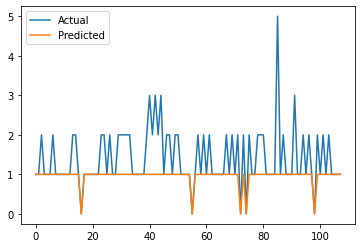

In [6]:
##########모델 예측


#for i in range(x_train_Tensor.shape[0]):
#    for j in range(x_train_Tensor.shape[1]):
#        print(x_train_Tensor[i, j], end=' ')
#    print('\r\n')

#print(x_test)
x_test_for_compare = np.asarray(x_test_array_reshape)

y_pred = model.predict(x_test_for_compare)

print("y_pred.shape")
print(y_pred.shape)
print("y_test.shape")
print(y_test.shape)

y_pred_01 = np.reshape(y_pred, (y_test.shape[0], -1))

#for i in range(y_pred_01.shape[0]):
#    for j in range(y_pred_01.shape[1]):
#        print(y_pred_01[i, j], end=' ')
#    print('===\r\n')

##########모델 검증 (정답과 예측치 비교)

#print(y_test.head())
print(y_pred_01.shape)
print(y_pred_01[:10])

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

%matplotlib inline


plt.plot(y_test)
plt.plot(y_pred_01)
plt.legend(["Actual", "Predicted", "A", "B", "C"])
plt.show()

In [7]:
#from numpy import *

#x = array(range(1,403))

#dataset = []
#for i in range(5):
#    dataset.append(x)

#target = [x[401] for x in dataset]
#train = [x[0:400] for x in dataset]

#print(x)
#print(dataset)